<a href="https://colab.research.google.com/github/CakeNuthep/Super_AI/blob/master/Homework/Week5/22p22c0044_%E0%B8%A8%E0%B8%B8%E0%B8%A0%E0%B8%8A%E0%B8%B1%E0%B8%A2_W5HW1_17102020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

In [ ]:
df = pd.read_csv('Online Retail.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
531278,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
531279,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
531280,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
531281,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531283 entries, 0 to 531282
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531283 non-null  object 
 1   StockCode    531283 non-null  object 
 2   Description  530691 non-null  object 
 3   Quantity     531283 non-null  int64  
 4   InvoiceDate  531283 non-null  object 
 5   UnitPrice    531283 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531283 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.4+ MB


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133359
Country             0
dtype: int64

In [ ]:
df.nunique()

InvoiceNo      20728
StockCode       3941
Description     4077
Quantity         393
InvoiceDate    19050
UnitPrice       1292
CustomerID      4340
Country           38
Amount          4907
Date             305
Month             13
dtype: int64

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,531283.000000,531283.000000,397924.000000
mean,10.655299,3.898954,15294.315171
std,156.830617,35.876279,1713.169877
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [ ]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['InvoiceDate'].dt.date
df['CustomerID'] = df['CustomerID'].astype(str)
df['Month'] = df['Date'].apply(lambda x:x.replace(day=1))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


In [ ]:
df['Date'].min()

datetime.date(2010, 12, 1)

In [ ]:
df['Date'].max()

datetime.date(2011, 12, 9)

In [ ]:
product_sales = df.groupby(by = 'Description').agg({'Amount':'sum', 'Quantity':'sum','Country':'nunique'})

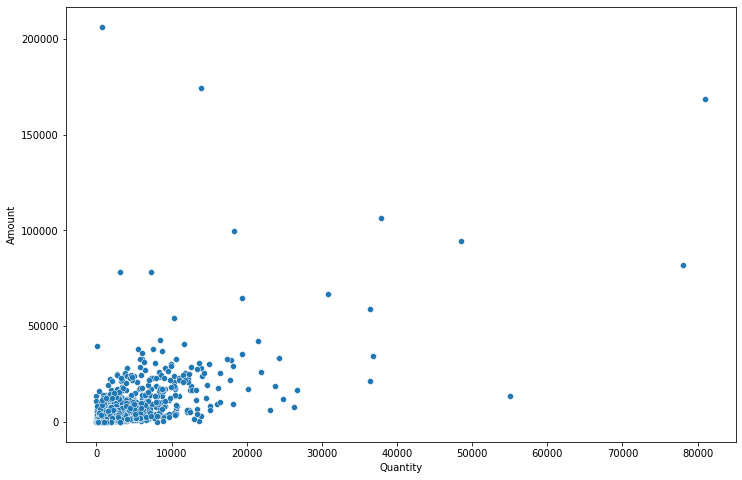

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Quantity', y='Amount', data=product_sales)

In [32]:
product_sales

,Amount,Quantity,Country
Description,,,
4 PURPLE FLOCK DINNER CANDLES,290.80,144,2
50'S CHRISTMAS GIFT BAG LARGE,2343.63,1915,6
DOLLY GIRL BEAKER,2891.25,2455,11
I LOVE LONDON MINI BACKPACK,1628.17,389,9
I LOVE LONDON MINI RUCKSACK,4.15,1,1
...,...,...,...
wrongly coded 20713,0.00,800,1
wrongly coded 23343,0.00,1000,1
wrongly marked,0.00,48,1


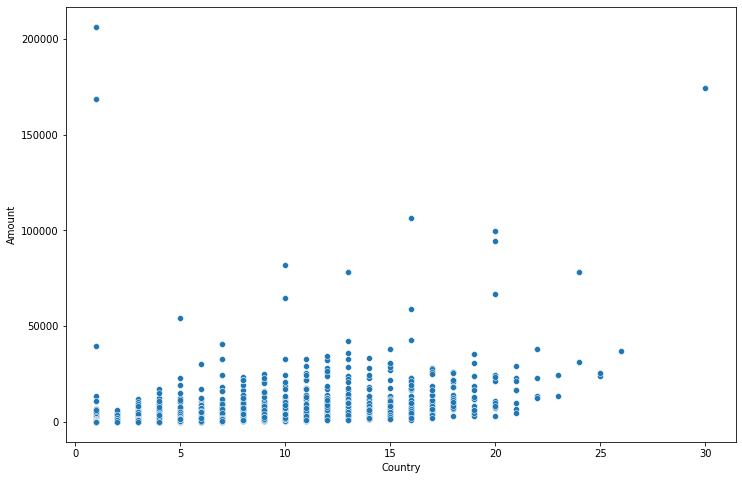

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Country', y='Amount', data=product_sales)

In [50]:
country_sales = df.groupby(by =['Country','Description']).agg({'Amount':'sum'})

In [51]:
country_sales

Amount
Country     Description                          
Australia    DOLLY GIRL BEAKER              216.0
             I LOVE LONDON MINI BACKPACK     16.6
            10 COLOUR SPACEBOY PEN           40.8
            12 PENCIL SMALL TUBE WOODLAND   211.2
            12 PENCILS TALL TUBE POSY        79.8
...                                           ...
Unspecified WRAP POPPIES  DESIGN             10.5
            WRAP SUKI AND FRIENDS            10.5
            WRAP VINTAGE PETALS  DESIGN      10.5
            WRAP WEDDING DAY                 10.5
            ZINC METAL HEART DECORATION       2.5

[20001 rows x 1 columns]

In [61]:
#Filter
filter = country_sales.index.get_level_values('Description') == 'WRAP WEDDING DAY'
country_sales_filter = country_sales[filter].sort_values(by='Amount',ascending=False)

In [63]:
country_sales_filter

,,Amount
Country,Description,
United Kingdom,WRAP WEDDING DAY,387.0
Australia,WRAP WEDDING DAY,68.0
Germany,WRAP WEDDING DAY,31.5
Cyprus,WRAP WEDDING DAY,10.5
EIRE,WRAP WEDDING DAY,10.5
Netherlands,WRAP WEDDING DAY,10.5
Unspecified,WRAP WEDDING DAY,10.5


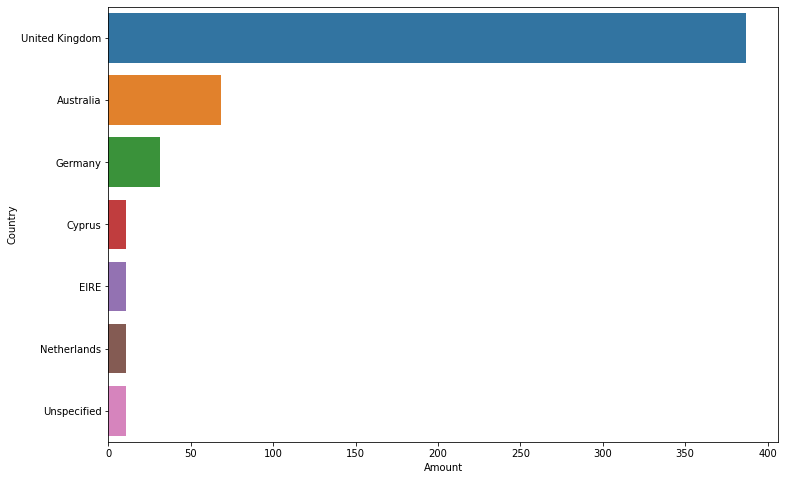

In [64]:
#country_sales_no_uk = country_sales[country_sales.index.values != 'United Kingdom'].sort_values(by='Amount',ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(y=country_sales_filter.index.get_level_values('Country'), x='Amount', data=country_sales_filter)

In [71]:
product_month = df.groupby(by =['Month','Description']).agg({'Amount':'sum','CustomerID':'nunique','Quantity':'sum'})

In [72]:
product_month

Amount  CustomerID  Quantity
Month      Description                                                    
2010-12-01  4 PURPLE FLOCK DINNER CANDLES      45.82           3        16
            OVAL WALL MIRROR DIAMANTE         283.03           5        22
            SET 2 TEA TOWELS I LOVE LONDON   1018.74          38       310
           *Boombox Ipod Classic               16.98           1         1
           *USB Office Mirror Ball             16.94           1         2
...                                              ...         ...       ...
2011-12-01 ZINC WIRE KITCHEN ORGANISER         63.20           6        16
           ZINC WIRE SWEETHEART LETTER TRAY    16.25           2        13
           check                                0.00           1        63
           dotcom                               0.00           1         4
           found                                0.00           1        66

[33867 rows x 3 columns]

In [73]:
filter = product_month.index.get_level_values('Description') == 'WRAP WEDDING DAY'
product_month_filter = product_month[filter]

In [99]:
product_month_filter

,,Amount,CustomerID,Quantity,type
Month,Description,,,,
2011-01-01,WRAP WEDDING DAY,42.0,4,100,product
2011-02-01,WRAP WEDDING DAY,31.5,3,75,product
2011-03-01,WRAP WEDDING DAY,21.0,2,50,product
2011-04-01,WRAP WEDDING DAY,42.0,4,100,product
2011-05-01,WRAP WEDDING DAY,42.0,4,100,product
2011-06-01,WRAP WEDDING DAY,99.5,4,275,product
2011-07-01,WRAP WEDDING DAY,52.5,5,125,product
2011-08-01,WRAP WEDDING DAY,42.0,4,100,product
2011-09-01,WRAP WEDDING DAY,103.5,4,275,product


In [104]:
product_month_filter_customer = product_month_filter[['CustomerID']].copy()
product_month_filter_customer['type'] = 'customer'
product_month_filter_product = product_month_filter[['Quantity']].copy()
product_month_filter_product['type'] = 'product'

In [115]:
product_month_filter_customer
product_month_filter_customer.rename(columns = {'CustomerID': 'number'}, inplace = True)
product_month_filter_product
product_month_filter_product.rename(columns = {'Quantity': 'number'}, inplace = True)

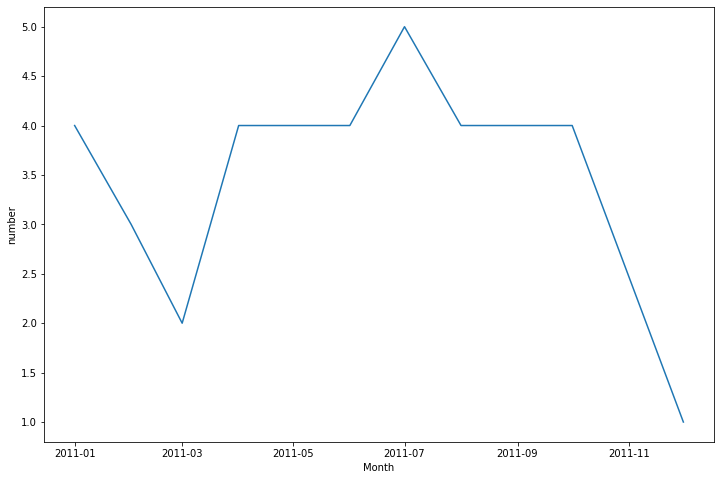

In [116]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month',y='number',data=product_month_filter_customer)

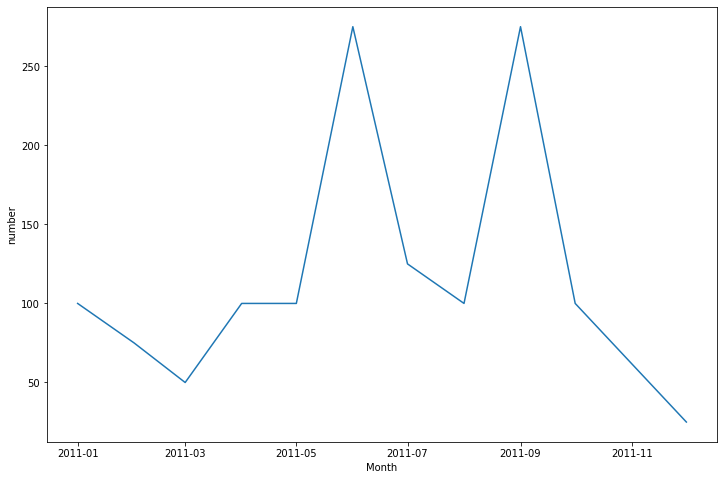

In [117]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month',y='number',data=product_month_filter_product)

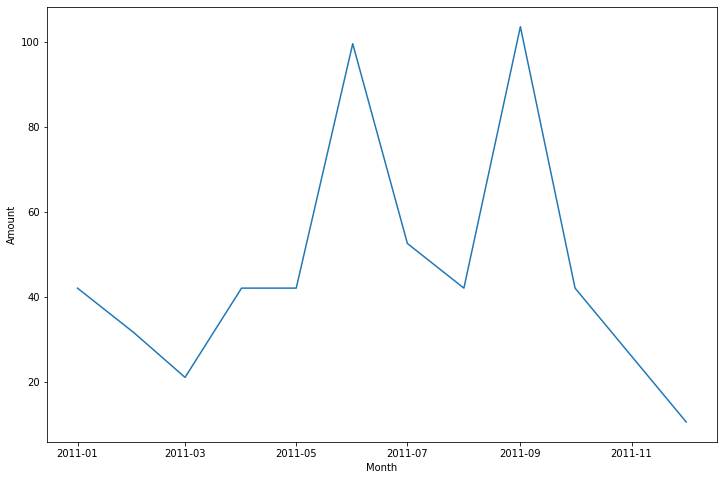

In [121]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Month',y='Amount',data=product_month_filter)

In [124]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [131]:
selectDate = df["InvoiceDate"].max() - timedelta(days=365)

In [133]:
df_one_year = df[df["InvoiceDate"] > selectDate]

In [134]:
df_one_year

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Month
19931,538032,22669,RED BABY BUNTING,5,2010-12-09 12:59:00,2.95,14479.0,United Kingdom,14.75,2010-12-09,2010-12-01
19932,538032,22465,HANGING METAL STAR LANTERN,12,2010-12-09 12:59:00,1.65,14479.0,United Kingdom,19.80,2010-12-09,2010-12-01
19933,538032,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-09 12:59:00,2.95,14479.0,United Kingdom,17.70,2010-12-09,2010-12-01
19934,538032,22727,ALARM CLOCK BAKELIKE RED,4,2010-12-09 12:59:00,3.75,14479.0,United Kingdom,15.00,2010-12-09,2010-12-01
19935,538032,22726,ALARM CLOCK BAKELIKE GREEN,4,2010-12-09 12:59:00,3.75,14479.0,United Kingdom,15.00,2010-12-09,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
531278,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,2011-12-01
531279,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,2011-12-01
531280,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,2011-12-01
531281,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,2011-12-01


In [135]:
df_one_year['Amount'].sum()

10260399.124

In [136]:
len(df_one_year['CustomerID'].unique())

4271

In [137]:
len(df_one_year['Description'].unique())

4034